In [1]:
#Importamos las carpetas que vamos a utilizar.
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
#Lo primero que haremos sera leer el archivo de texto que utilizaremos en el trabajo y
#reemplacaremos los datos nulos.
df0 = pd.read_csv('meteo-nogal-09.csv', skiprows=0, engine='python')
df0 = df0.replace('Nulo','DN')

In [3]:
#Creamos un Dataframe con los datos leidos.
df00= pd.DataFrame(df0)
df00.head(), df00.tail()

(       DATE   TIME  Unnamed: 2  Unnamed: 3  u_Avg      v_Avg        w_Avg  \
 0        TS    NaN         NaN         NaN    m/s        m/s          m/s   
 1  01-01-09  00:10         1.0         NaN  1.215      0.506       -0.044   
 2  01-01-09  00:20         1.0         NaN  0.892      0.588       -0.072   
 3  01-01-09  00:30         1.0         NaN  1.227  0.6850001  -0.06900001   
 4  01-01-09  00:40         1.0         NaN  1.135  0.7410001       -0.093   
 
    t_Avg kh20_Avg net_rad_Avg     ...     Unnamed: 26 Unnamed: 27 Unnamed: 28  \
 0   degC       mV        w/m2     ...             NaN         NaN         NaN   
 1  10.95    1.159      -176.5     ...             NaN         NaN         NaN   
 2  10.81    1.159      -176.6     ...             NaN         NaN         NaN   
 3  10.34    1.224      -175.5     ...             NaN         NaN         NaN   
 4    9.8    1.258      -182.7     ...             NaN         NaN         NaN   
 
   Unnamed: 29  Unnamed: 30 Unnamed:

In [4]:
df00.dtypes

DATE            object
TIME            object
Unnamed: 2     float64
Unnamed: 3     float64
u_Avg           object
v_Avg           object
w_Avg           object
t_Avg           object
kh20_Avg        object
net_rad_Avg     object
shf1_Avg        object
shf2_Avg        object
vv_Avg          object
airT_Avg        object
rh_Avg         float64
e_sat_Avg       object
e_Avg           object
h2o_hmp_Avg     object
Unnamed: 18    float64
Unnamed: 19     object
Unnamed: 20     object
Unnamed: 21    float64
Unnamed: 22     object
Unnamed: 23     object
Unnamed: 24     object
Unnamed: 25     object
Unnamed: 26     object
Unnamed: 27     object
Unnamed: 28     object
Unnamed: 29     object
Unnamed: 30     object
Unnamed: 31     object
Unnamed: 32     object
Unnamed: 33     object
Unnamed: 34     object
Unnamed: 35     object
dtype: object

In [5]:
#Eliminamos los datos que no vamos a utilizar.
df00.drop(df00.columns[18:36],axis=1,inplace=True) 
df00.drop(df00.columns[2:4],axis=1,inplace=True)

df00.head(), df00.tail()

(       DATE   TIME  u_Avg      v_Avg        w_Avg  t_Avg kh20_Avg net_rad_Avg  \
 0        TS    NaN    m/s        m/s          m/s   degC       mV        w/m2   
 1  01-01-09  00:10  1.215      0.506       -0.044  10.95    1.159      -176.5   
 2  01-01-09  00:20  0.892      0.588       -0.072  10.81    1.159      -176.6   
 3  01-01-09  00:30  1.227  0.6850001  -0.06900001  10.34    1.224      -175.5   
 4  01-01-09  00:40  1.135  0.7410001       -0.093    9.8    1.258      -182.7   
 
   shf1_Avg shf2_Avg vv_Avg  airT_Avg  rh_Avg e_sat_Avg  e_Avg h2o_hmp_Avg  
 0     w/m2     w/m2    m/s      degC     NaN       kPa    kPa        g/m3  
 1    23.58   -26.72  1.327       9.4   0.899     1.178  1.059        8.12  
 2    23.73   -26.76  1.079      9.24   0.896     1.166  1.045        8.02  
 3    23.61   -26.46  1.421  9.059999   0.896     1.152  1.032    7.926001  
 4    23.41   -26.46  1.384  9.059999   0.874     1.152  1.008       7.737  ,
              DATE      TIME  u_Avg   v_Avg

In [6]:
#Tambien eliminamos el primer renglon de cada columna para cuestiones del trabajo y
#reiniciamos el contador para poder volver a utilizarlo.
df1=df00.drop(index=0)
df1=df1.reset_index(drop=True)
df1.head(), df1.tail()

(       DATE   TIME      u_Avg      v_Avg        w_Avg  t_Avg kh20_Avg  \
 0  01-01-09  00:10      1.215      0.506       -0.044  10.95    1.159   
 1  01-01-09  00:20      0.892      0.588       -0.072  10.81    1.159   
 2  01-01-09  00:30      1.227  0.6850001  -0.06900001  10.34    1.224   
 3  01-01-09  00:40      1.135  0.7410001       -0.093    9.8    1.258   
 4  01-01-09  00:50  0.7550001      1.064       -0.149   8.87    1.332   
 
   net_rad_Avg shf1_Avg shf2_Avg vv_Avg  airT_Avg  rh_Avg e_sat_Avg  e_Avg  \
 0      -176.5    23.58   -26.72  1.327       9.4   0.899     1.178  1.059   
 1      -176.6    23.73   -26.76  1.079      9.24   0.896     1.166  1.045   
 2      -175.5    23.61   -26.46  1.421  9.059999   0.896     1.152  1.032   
 3      -182.7    23.41   -26.46  1.384  9.059999   0.874     1.152  1.008   
 4      -184.8    23.22   -26.39  1.359      8.63   0.859     1.119  0.961   
 
   h2o_hmp_Avg  
 0        8.12  
 1        8.02  
 2    7.926001  
 3       7.737  

In [7]:
#Ahora uniremos las columnas de fecha y tiempo para fines del trabajo y las graficas, tambien
#quitaremos los datos que ya no nos sirven.
df1['Fecha']=df1['DATE'] + ' ' + df1['TIME']
df1.drop(['DATE', 'TIME'],axis=1,inplace=True)
df1['Fecha'] = pd.to_datetime(df1['Fecha'])

In [8]:
#Ahora convertiremos las demas columnas al tipo numerico o flotante, para los mismos fines del trabajo.
df1[df1.columns[0:14]]=df1[df1.columns[0:14]].apply(pd.to_numeric, errors='coerce')

In [9]:
df1.dtypes

u_Avg                 float64
v_Avg                 float64
w_Avg                 float64
t_Avg                 float64
kh20_Avg              float64
net_rad_Avg           float64
shf1_Avg              float64
shf2_Avg              float64
vv_Avg                float64
airT_Avg              float64
rh_Avg                float64
e_sat_Avg             float64
e_Avg                 float64
h2o_hmp_Avg           float64
Fecha          datetime64[ns]
dtype: object

In [10]:
#Ahora, como trabjaremos solo con los datos del año 2009, nos desharemos de los demas datos que no ocuparemos.
df1=df1.drop(df1.index[df1['Fecha'] >='2010-01-01']) 
df1.head(), df1.tail()

(   u_Avg  v_Avg  w_Avg  t_Avg  kh20_Avg  net_rad_Avg  shf1_Avg  shf2_Avg  \
 0  1.215  0.506 -0.044  10.95     1.159       -176.5     23.58    -26.72   
 1  0.892  0.588 -0.072  10.81     1.159       -176.6     23.73    -26.76   
 2  1.227  0.685 -0.069  10.34     1.224       -175.5     23.61    -26.46   
 3  1.135  0.741 -0.093   9.80     1.258       -182.7     23.41    -26.46   
 4  0.755  1.064 -0.149   8.87     1.332       -184.8     23.22    -26.39   
 
    vv_Avg  airT_Avg  rh_Avg  e_sat_Avg  e_Avg  h2o_hmp_Avg               Fecha  
 0   1.327  9.400000   0.899      1.178  1.059     8.120000 2009-01-01 00:10:00  
 1   1.079  9.240000   0.896      1.166  1.045     8.020000 2009-01-01 00:20:00  
 2   1.421  9.059999   0.896      1.152  1.032     7.926001 2009-01-01 00:30:00  
 3   1.384  9.059999   0.874      1.152  1.008     7.737000 2009-01-01 00:40:00  
 4   1.359  8.630000   0.859      1.119  0.961     7.390000 2009-01-01 00:50:00  ,
        u_Avg  v_Avg  w_Avg   t_Avg  kh20_A

In [11]:
#Creamos la matriz de correlacion con el DataFrame de datos que tenemos.
corr=df1.corr()
corr

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
u_Avg,1.000000,0.241494,0.015906,0.044331,-0.049445,-0.094394,0.089411,0.003542,-0.163176,-0.363548,0.331126,-0.370644,0.103343,0.173845
v_Avg,0.241494,1.000000,0.009572,0.011734,0.155188,-0.117176,0.029321,-0.053846,-0.088159,-0.344386,0.098515,-0.347170,-0.109168,-0.189840
w_Avg,0.015906,0.009572,1.000000,0.601335,0.128426,0.133556,-0.079466,-0.010182,0.912885,-0.338470,0.737544,-0.192107,0.646316,0.125133
t_Avg,0.044331,0.011734,0.601335,1.000000,-0.009929,0.266318,-0.094414,-0.006335,0.529160,-0.231403,0.367252,-0.139445,0.306703,0.576896
kh20_Avg,-0.049445,0.155188,0.128426,-0.009929,1.000000,-0.157759,-0.005268,-0.061590,0.152027,-0.122687,0.024498,-0.123180,-0.126972,-0.326760
net_rad_Avg,-0.094394,-0.117176,0.133556,0.266318,-0.157759,1.000000,-0.206065,-0.027206,0.162470,0.334375,-0.266374,0.385945,0.074294,0.056376
shf1_Avg,0.089411,0.029321,-0.079466,-0.094414,-0.005268,-0.206065,1.000000,0.059003,-0.089608,-0.121637,0.084782,-0.138901,-0.016448,0.014207
shf2_Avg,0.003542,-0.053846,-0.010182,-0.006335,-0.061590,-0.027206,0.059003,1.000000,-0.017229,0.078023,0.017651,0.081718,0.051809,0.151206
vv_Avg,-0.163176,-0.088159,0.912885,0.529160,0.152027,0.162470,-0.089608,-0.017229,1.000000,-0.223757,0.582047,-0.091182,0.521232,-0.193064
airT_Avg,-0.363548,-0.344386,-0.338470,-0.231403,-0.122687,0.334375,-0.121637,0.078023,-0.223757,1.000000,-0.484177,0.964464,0.088203,0.464621


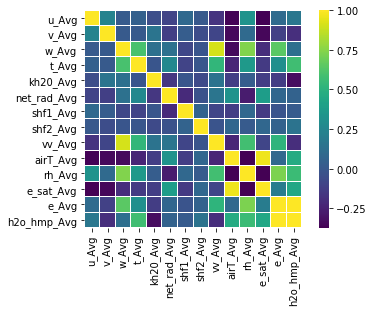

In [12]:
#Primero usaremos el Heat Map creado con Matplotlib, para graficar los datos.

sb.heatmap(corr,cmap="viridis",robust=True,square=True,linewidths=.01)
plt.show()

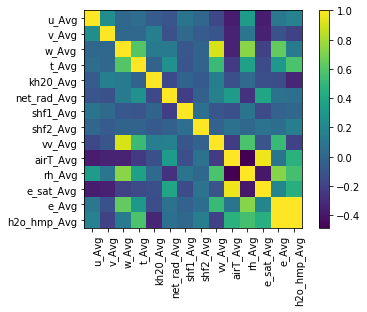

In [13]:
fig, ax = plt.subplots()
ax.set_xticks(np.arange(len(corr)))
ax.set_yticks(np.arange(len(corr)))

ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

plt.setp(ax.get_xticklabels(), rotation=90,ha="right",rotation_mode="anchor")


plt.imshow(corr, cmap='viridis',interpolation='nearest')
plt.colorbar()

plt.show()

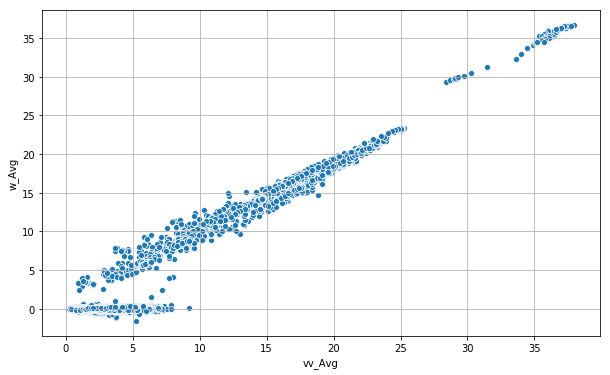

In [14]:
#Grafica de dispersion de puntos para datos de 'vv_Avg' y 'w_Avg' con una correlacion de 0.91
plt.figure(figsize = (10, 6))
ax = sb.scatterplot(x=df1['vv_Avg'],y=df1['w_Avg'])
plt.grid()

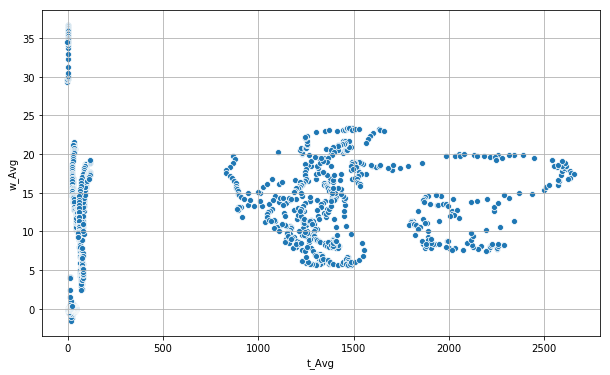

In [15]:
#Grafica de dispersion de puntos para datos de 't_Avg' y 'w_Avg' con una correlacion de 0.6
plt.figure(figsize = (10, 6))
ax = sb.scatterplot(x=df1['t_Avg'],y=df1['w_Avg'])
plt.grid()

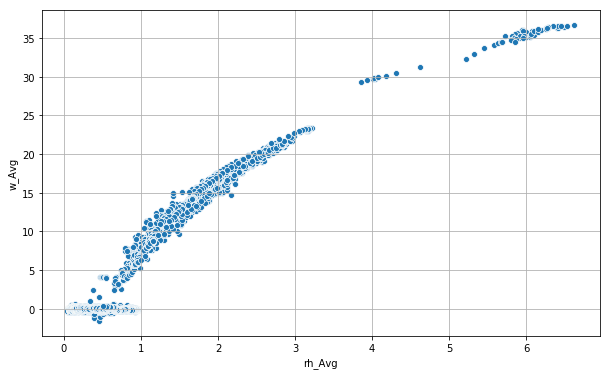

In [16]:
#Grafica de dispersion de puntos para datos de 'rh_Avg' y 'w_Avg' con una correlacion de 0.74
plt.figure(figsize = (10, 6))
ax = sb.scatterplot(x=df1['rh_Avg'],y=df1['w_Avg'])
plt.grid()

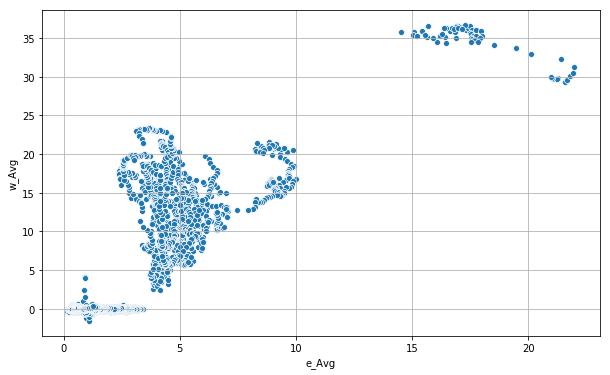

In [17]:
#Grafica de dispersion de puntos para datos de 'e_Avg' y 'w_Avg' con una correlacion de 0.65
plt.figure(figsize = (10, 6))
ax = sb.scatterplot(x=df1['e_Avg'],y=df1['w_Avg'])
plt.grid()

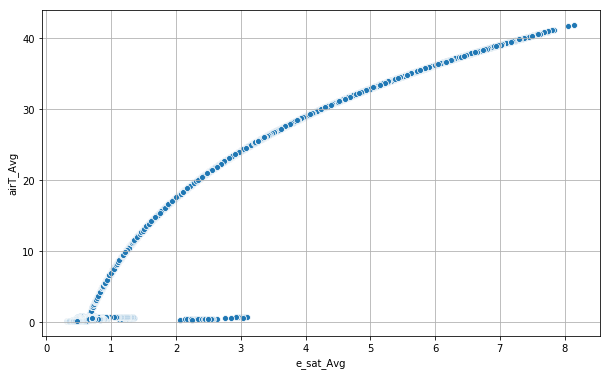

In [18]:
#Grafica de dispersion de puntos para datos de 'e_sat_Avg' y 'airT_Avg' con una correlacion de 0.96
plt.figure(figsize = (10, 6))
ax = sb.scatterplot(x=df1['e_sat_Avg'],y=df1['airT_Avg'])
plt.grid()

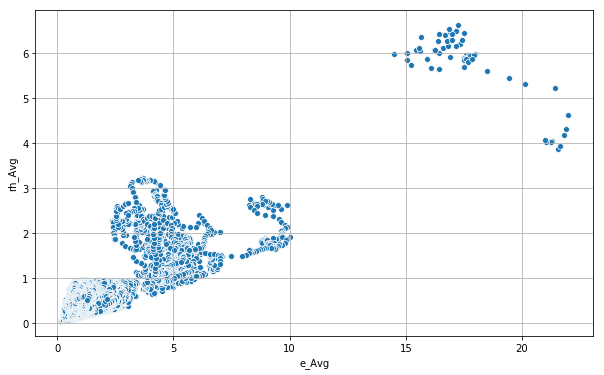

In [19]:
#Grafica de dispersion de puntos para datos de 'e_Avg' y 'rh_Avg' con una correlacion de 0.73
plt.figure(figsize = (10, 6))
ax = sb.scatterplot(x=df1['e_Avg'],y=df1['rh_Avg'])
plt.grid()